In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import math

import sklearn.metrics as sm

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix,accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor

from tqdm import tqdm

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

In [41]:
df_cluster = pd.read_csv(r'BD Tratado\cluster.csv',sep=';')
df_cluster = df_cluster[['MATRÍCULA', 'cluster']]
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35862 entries, 0 to 35861
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   MATRÍCULA  35862 non-null  int64
 1   cluster    35862 non-null  int64
dtypes: int64(2)
memory usage: 560.5 KB


In [63]:
df_func = pd.read_excel(r'BD\Dados Vivante Funcionários.xlsx',sheet_name='DADOS FUNCIONAIS')
df_func = df_func.merge(df_cluster, how = 'left', on = 'MATRÍCULA')
df_func = df_func[df_func['cluster'] == 1]
df_func.shape

(9092, 16)

In [42]:
df_org = pd.read_csv(r'BD Tratado\VariaveisValidadas.csv',sep=';')
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35862 entries, 0 to 35861
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MATRÍCULA                 35862 non-null  int64  
 1   ATRASO                    35862 non-null  float64
 2   Carga                     35862 non-null  float64
 3   Tempo de casa             35862 non-null  float64
 4   SALÁRIO                   35862 non-null  float64
 5   SO                        35862 non-null  float64
 6   SX                        35862 non-null  float64
 7   MANUAL                    35862 non-null  float64
 8   dist                      35862 non-null  float64
 9   HORÁRIO INÍCIO            35862 non-null  float64
 10  HORÁRIO FINAL             35862 non-null  float64
 11  DiaSemana                 35862 non-null  int64  
 12  DiaSemana_0               35862 non-null  int64  
 13  DiaSemana_1               35862 non-null  int64  
 14  DiaSem

In [43]:
df = df_cluster.merge(df_org, how = 'left', on='MATRÍCULA')
df = df.drop_duplicates()
df = df[df['cluster']==1]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8912 entries, 5329 to 2387493
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MATRÍCULA                 8912 non-null   int64  
 1   cluster                   8912 non-null   int64  
 2   ATRASO                    8912 non-null   float64
 3   Carga                     8912 non-null   float64
 4   Tempo de casa             8912 non-null   float64
 5   SALÁRIO                   8912 non-null   float64
 6   SO                        8912 non-null   float64
 7   SX                        8912 non-null   float64
 8   MANUAL                    8912 non-null   float64
 9   dist                      8912 non-null   float64
 10  HORÁRIO INÍCIO            8912 non-null   float64
 11  HORÁRIO FINAL             8912 non-null   float64
 12  DiaSemana                 8912 non-null   int64  
 13  DiaSemana_0               8912 non-null   int64  
 14  Di

In [44]:
df = df.drop(['MATRÍCULA','Mes','SalarioMin','DiaSemana','cluster'],axis=1)
for col in df.columns:
    if 'SINDICATO' in col:
        df = df.drop(col,axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8912 entries, 5329 to 2387493
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ATRASO          8912 non-null   float64
 1   Carga           8912 non-null   float64
 2   Tempo de casa   8912 non-null   float64
 3   SALÁRIO         8912 non-null   float64
 4   SO              8912 non-null   float64
 5   SX              8912 non-null   float64
 6   MANUAL          8912 non-null   float64
 7   dist            8912 non-null   float64
 8   HORÁRIO INÍCIO  8912 non-null   float64
 9   HORÁRIO FINAL   8912 non-null   float64
 10  DiaSemana_0     8912 non-null   int64  
 11  DiaSemana_1     8912 non-null   int64  
 12  DiaSemana_2     8912 non-null   int64  
 13  DiaSemana_3     8912 non-null   int64  
 14  DiaSemana_4     8912 non-null   int64  
 15  DiaSemana_5     8912 non-null   int64  
 16  DiaSemana_6     8912 non-null   int64  
 17  Mes_1           8912 non-nu

In [45]:
df.corr()['ATRASO'].sort_values()

HORÁRIO INÍCIO   -0.163503
DiaSemana_6      -0.074658
dist             -0.048316
Mes_4            -0.036630
Mes_5            -0.035465
Mes_6            -0.031094
Mes_12           -0.029044
SX               -0.022719
Mes_9            -0.018266
DiaSemana_5      -0.011231
DiaSemana_1       0.000500
Mes_1             0.002055
DiaSemana_4       0.007106
DiaSemana_2       0.009476
DiaSemana_3       0.010833
Mes_10            0.012577
Mes_8             0.015354
DiaSemana_0       0.017278
Mes_7             0.021334
Mes_3             0.023930
Mes_11            0.027057
Mes_2             0.027698
SO                0.050964
Carga             0.118107
MANUAL            0.120386
HORÁRIO FINAL     0.154654
Tempo de casa     0.157460
SALÁRIO           0.180348
ATRASO            1.000000
Name: ATRASO, dtype: float64

In [46]:
df = df[['SALÁRIO', 'Tempo de casa', 'MANUAL', 'Mes_4', 'DiaSemana_6', 'Carga','dist', 'HORÁRIO INÍCIO', 'ATRASO']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8912 entries, 5329 to 2387493
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SALÁRIO         8912 non-null   float64
 1   Tempo de casa   8912 non-null   float64
 2   MANUAL          8912 non-null   float64
 3   Mes_4           8912 non-null   int64  
 4   DiaSemana_6     8912 non-null   int64  
 5   Carga           8912 non-null   float64
 6   dist            8912 non-null   float64
 7   HORÁRIO INÍCIO  8912 non-null   float64
 8   ATRASO          8912 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 696.2 KB


In [47]:
X = df.drop('ATRASO',axis=1)
y = df.iloc[:,8].values
print(X.shape)
print(y.shape)

(8912, 8)
(8912,)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)

In [49]:
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('RD', Pipeline([('Scaler', StandardScaler()),('RD', Ridge())])))
pipelines.append(('LS', Pipeline([('Scaler', StandardScaler()),('LS', Lasso())])))
pipelines.append(('EL', Pipeline([('Scaler', StandardScaler()),('EL', ElasticNet())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor(metric = 'manhattan', n_neighbors = 7, weights = 'distance'))])))
pipelines.append(('DTR', Pipeline([('Scaler', StandardScaler()),('DTR', DecisionTreeRegressor(max_leaf_nodes = 29, min_samples_split = 2))])))
pipelines.append(('RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
pipelines.append(('ADA', Pipeline([('Scaler', StandardScaler()),('ADA', AdaBoostRegressor())])))
pipelines.append(('SVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
pipelines.append(('SVR-RBF', Pipeline([('Scaler', StandardScaler()),('SVR', SVR(kernel='rbf', C=1, gamma=1))])))

results = []
names = []


In [50]:
# Avaliação dos Pipelines
num_folds = 10
RMS = 'neg_mean_squared_error'

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=25, shuffle = True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=RMS)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -978.583768 (48.377110)
RD: -978.583046 (48.375448)
LS: -984.385759 (47.228264)
EL: -987.402978 (46.665234)
KNN: -642.938248 (69.960114)
DTR: -690.913486 (53.354369)
RF: -579.622163 (62.063937)
ADA: -892.090110 (46.951583)
SVR: -904.174165 (64.977841)
SVR-RBF: -800.711061 (67.919159)


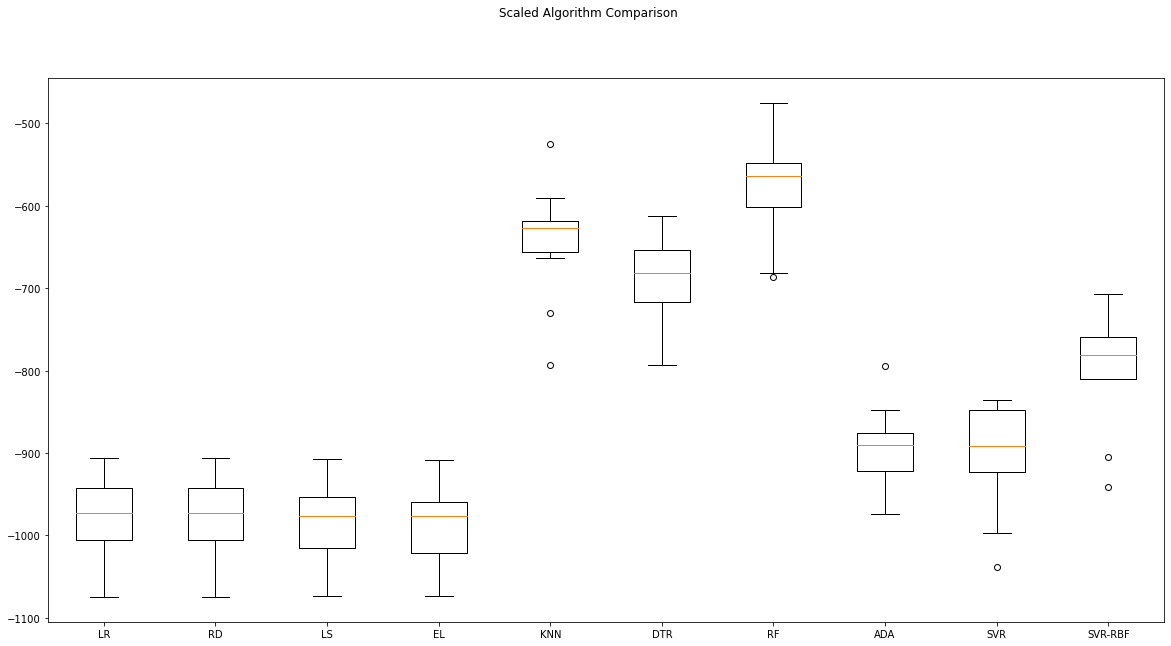

In [51]:
# Comparando os Algorítimos
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [52]:
rf = RandomForestRegressor()

In [53]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
rf.fit(rescaledX, y_train)

RandomForestRegressor()

In [54]:
rescaledTestX = scaler.transform(X_test)
predictions = rf.predict(rescaledTestX)

In [56]:
#MAE
print(metrics.mean_absolute_error(y_test, predictions))
#MSE
mse = metrics.mean_squared_error(y_test, predictions)
print(mse)
#RMSE
rmse = math.sqrt(mse)
print(rmse)

15.609116309764156
556.8039811466815
23.596694284299264


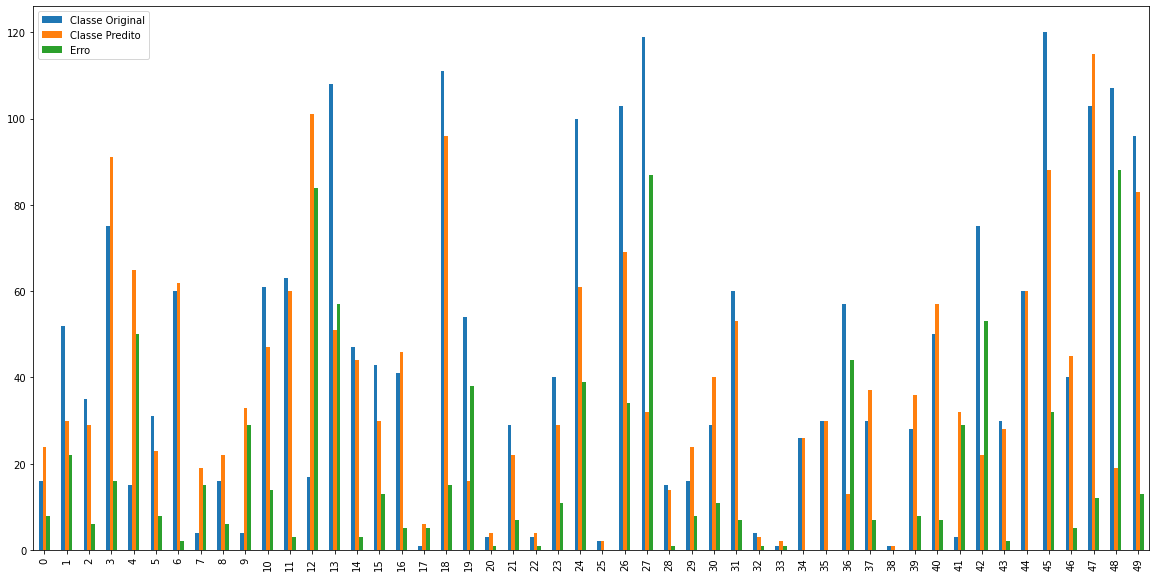

In [57]:
predictions=predictions.astype(int)
erros = np.absolute( y_test - predictions)
finalresult = pd.DataFrame({
        "Classe Original": y_test,
        "Classe Predito": predictions,
        "Erro" : erros
    })

finalresult.head(50).plot(kind='bar',figsize=(20,10))